# STAT 345: Nonparametric Statistics

## Lesson 00.1: Intro to the Course and Setting up Computing Environment

**Reading: Conover Chapter 1**

*Prof. John T. Whelan*

Tuesday 14 January 2025

## Preliminaries

### Administrata

-   Introductions!
-   [Syllabus](syllabus.pdf)
-   Instructor’s name (Whelan) rhymes with "wailin’". 
-   Text: Conover, *Practical Nonparametric Statistics*, 3rd edition.<br>(See syllabus for other resources.)
-   Course materials in MyCourses; see especially [timetable](timetable.html)<br>(but also "Content" and "Assignments")
-   Materials from previous section may be useful:<br>http://ccrg.rit.edu/~whelan/courses/2018_3fa_STAT_345/

### Course work:

- Read relevant sections of textbook before class
- Conover has many short exercises; answers to odd-numbers in the book, but more useful if you try them before looking!

- Problem Sets distributed & collected in MyCourses.
   - Part One: book problems
   - Part Two: computational exercise

- Prelim exam (think midterm, but there are two of them) format TBC.
- Cumulative final exam

### Grading

- 25% Problem Sets & Project
- 20% First Prelim Exam
- 20% Second Prelim Exam
- 35% Final Exam

You'll get a separate grade on the "quality point" scale (e.g., 2.5--3.5
is the B--including B- and B+--range) for each of these four components; course grade is
weighted average.

### COVID Considerations

https://pmc19.com/data/

### COVID Considerations

https://covid.cdc.gov/ &emsp;
https://peoplescdc.org/ &emsp;
https://pmc19.com/data/<br>
https://www.cdc.gov/nwss/rv/COVID19-statetrend.html

- After the "autumn lull", we've begun the "winter wave"<br>
(plus school starting means new exposure opportunities)

- Lessons will be streamed over Zoom
    - can attend in person or remotely
    - no attendence requirement
- Homework submitted online
- Stay home if you're sick (attend remotely if up to it)
- Consider masking indoors (KN95 > surgical > cloth)

## Perspective on Nonparametric Methods

> "...there are known knowns; there are things we know we know. We also know there are known unknowns; that is to say we know there are some things we do not know. But there are also unknown unknowns—the ones we don't know we don't know." -- Donald Rumsfeld, US Defense Secretary 1975-1977 & 2001-2006

- In intro stats (MATH-252, STAT-257 or STAT-205), learned procedures to estimate quantities & testing hypotheses, many based on the normal distribution.  May have seen arbitrary, but many are **optimal procedures**, known to outperform alternatives **if** underlying properties of the random data are known

- E.g., if you have a sample drawn from a specified distribution with unknown parameters, you are quantifying the "known unknowns"

- If you don't know the underlying distribution (not even what family it belongs to), you're dealing with "unknown unknowns", and nonparametric methods can be more useful.

- Note that “nonparametric” is often a misnomer; might be estimating the median of a distribution, which can be considered a parameter. More general term is **robust** methods, which may not be most efficient in ideal cases, but still perform well when simplifying assumptions don't apply.

## Outline

1.  Review/Basics of Probability and Statistical Inference (Chapters One and Two)

2.  Binomial Tests (Chapter Three)

3.  Rank-Based Tests (Chapter Five)

4.  Kolmagorov-Smirnov Statistics (Chapter Six)

5.  Contingency Tables (Chapter Four)

## Computing Environment

We'll use computational tools, mostly Python & the SciPy `stats` package.  Main motivations:

- Avoid anachronism of looking up probabilities & percentiles in tables.  (Reminiscent of math books from the 1980s w/tables of trig functions, exponentials, etc.)  Don't need to look up or interpolate the 97.5th percentile of the Student-$t$ distribution w/12 degrees of freedom if we can just use

In [1]:
from scipy import stats
stats.t(df=12).ppf(0.975)

2.1788128296634177

- Process realistic-sized data sets rather than copying down a dozen numbers from the textbook.

- Some properties of nonparametric methods are difficult or impossible to prove analytically, but we can explore them numerically using Monte Carlo simulations.

- Also gain a potentially useful skill (data analysis with Python) in the process.

## Introduction to Python, NumPy and Jupyter

- Lessons & assignments for this course are Jupyter notebooks
- The notebook can run Python commands (other notebooks can use R or Julia; "Ju-Pyt-R").  Think: computational data analysis, not "coding".

- Can run on JupyterHub server via http://vmware.rit.edu/ or download `.ipynb` file & run yourself (`ipynb` stands for IPython Notebook, an older name for Jupyter)

- Divided into "cells" of different types; we'll mostly use "Markdown" & "Code" cells
- Shift-return either renders or executes a cell.

- If you want to run locally, you need to install Jupyter, Python and a few other packages.
  * User-friendly option: Anaconda: https://www.anaconda.com/products/distribution
  * More robust but still pretty easy: Mamba: https://mamba.readthedocs.io/en/latest/installation/mamba-installation.html

- My local installation used (in 2023):
<pre>~/mambaforge/bin/mamba create -n STAT345
conda activate STAT345
mamba install jupyter
mamba install scipy
pip install rise
mamba install jupyterlab
mamba install jupytext
pip install nbmerge
mamba install matplotlib</pre>

### Markdown Cells

- Markdown is a simple formatting language. (Its name is a pun on "markup")
- Designed so raw code is legible even if not rendered.
- Can use *italics*, **bold**, or `monospace`.
- Most significantly, can use features of LaTeX to format math.
- Easiest introduction to LaTeX is to double-click on a markdown cell and see the source

1. Math is written in dollar signs, like $x=5$.

2. If you use double dollar signs, you get things displayed on a line by themselves, like
$$
X = a + 3 b
$$

3. Subscripts and superscripts are written with `_` and `^`, respectively: $x_1=2.45$, $2^4=16$.

4. Braces `{` and `}` can be used to enclose expressions when needed: $x_{10}$ not $x_10$.

5. Greek letters and other special characters are written with a backslash: $x=\mu\pm \sigma$.

6. Fractions can be written with the `\frac` macro: $\frac{dy}{dx}=\sqrt{x}$

7. Sums, integrals and products have large operators defining them:
$$
\int_0^x e^t\,dt = \sum_{n=0}^{\infty} \frac{x^n}{n!}
$$

You can get a lot more documentation by doing a web search for something like `jupyter markdown`.

## Python Basics

https://xkcd.com/353/ "Python"

- We'll also use Code cells, which contain commands to be executed.  We'll use Python 3, but Jupyter can also handle other languages like R, Julia, and SageMath (you can change the language in the notebook if you have a strong preference)

- Python is an interpreted/scripting language, so you can type simple commands & run them one at a time without worrying about technical details like allocating memory, declaring variables, etc.

- In addition to the basic built-in Python commands, we'll use a few specific libraries extensively:
  * Numerical Python or NumPy for computations and sophisticated data types
  * Scientific Python or SciPy, especially the `scipy.stats` package
  * Matplotlib for plotting

- We'll go over some of the most basic/important tricks here; you can examine skipped-over sections in the notebook at your leisure.

We start with some boilerplate to display plots in the notebook (other possibilities are `%matplotlib notebook` or the deprecated `%pylab inline`)

In [2]:
%matplotlib inline

Also to import the libraries we'll use often:

In [3]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

And finally some tweaks to make the figures a little more legible:

In [4]:
plt.rcParams['figure.figsize'] = (8.0,5.0)
plt.rcParams['font.size'] = 14

### Data Types

Don't have to declare variables, but they do still have distinct types.  E.g. numbers can be integers:

In [5]:
x = 3; x

3

Or "floating point":

In [6]:
y = 9.0; y

9.0

In [7]:
y + 1.5

10.5

In [8]:
y**(-6)

1.8816764231589208e-06

Note that the operator for raising to a power is `**`, not `^`, which does something very different which we don't need right now:

In [9]:
10**2

100

In [10]:
10^2

8

Floating point arithmetic can sometimes lead to roundoff errors, since it's not possible to express all real numbers exactly:

In [11]:
1+1+1-3

0

In [12]:
0.1+0.1+0.1-0.3

5.551115123125783e-17

Integers and floats behave differently under division.  The `/` operator is for floating point division:

In [13]:
5. / 3.

1.6666666666666667

While integer division with truncation is done with the `//`
and the remainder is available with `%`:

In [14]:
5 // 3

1

In [15]:
5 % 3

2

As of Python 3, if you try to use `/` on integers, it automatically converts them to floating point first:

In [16]:
5 / 3

1.6666666666666667

Python also has a string data type, with its own set of operations:

In [17]:
x = 'foo'
y = 'bar'
x + y

'foobar'

### Lists in Python

Python has a standard list datatype which can contain different types of data:

In [18]:
stuff_i = [1,2.0,'three']; stuff_i

[1, 2.0, 'three']

You can use indices to get elements of the list.  Like many computing languages, Python counts from zero:

In [19]:
stuff_i[0]

1

In [20]:
stuff_i[1]

2.0

In [21]:
stuff_i[2]

'three'

One useful construction is that using `-1` as an index gives the last element (as opposed to R, where `stuff_i[-1]` would be an array containing all the elements *except* `stuff_i[1]`):

In [22]:
stuff_i[-1]

'three'

You can also specify multiple indices to get a "slice" of the list:

In [23]:
stuff_i[0:2]

[1, 2.0]

This says that `stuff_i[0]` is the first element in the slice, and `stuff_i[2]` is the first element *not* included in the slice.  Since starting with `stuff_i[0]` isn't actually a restriction, you can omit it:

In [24]:
stuff_i[:2]

[1, 2.0]

Also note that, since there are three elements in the list, element `2` and element `-1` are the same thing:

In [25]:
stuff_i[:2]

[1, 2.0]

In [26]:
stuff_i[:-1]

[1, 2.0]

You can also get the length of a list like this:

In [27]:
len(stuff_i)

3

You can also make a list of lists, which is useful for organizing things like samples of different sizes:

In [28]:
nestedstuff_i_j = [[1,2,3,4],[10,20,30]]
nestedstuff_i_j

[[1, 2, 3, 4], [10, 20, 30]]

In [29]:
nestedstuff_i_j[0]

[1, 2, 3, 4]

In [30]:
nestedstuff_i_j[0][-1]

4

### Tuples

One of the important features of lists is that you can modify elements of them after they've been defined:

In [31]:
stuff_i[2] = np.pi; stuff_i

[1, 2.0, 3.141592653589793]

Closely related is a *tuple*; like a list, but "immutable", i.e., once you define it, you can't change its elements:

In [32]:
stufftup_i = (1,2.0,'three'); stufftup_i

(1, 2.0, 'three')

In [33]:
stufftup_i[2] = np.pi

TypeError: 'tuple' object does not support item assignment

The previous cell generates an error because `stufftup_i` is a tuple, and you're not allowed to modify it once it's been defined.

### NumPy Arrays

NumPy introduces a generalization of the list (and list of lists) known as an array.  All of the data in an array has to be the same type, and if it's constructed from a list of lists, they must all be the same length.  Here is a one-index array, which is like a 3-element vector:

In [34]:
A_i = np.array([1,2,3]); A_i

array([1, 2, 3])

And a two-dimensional array, which is like a $2\times 3$ matrix:

In [35]:
B_ij = np.array([[1,2,3],[10,20,30]])
B_ij

array([[ 1,  2,  3],
       [10, 20, 30]])

Rather than the length of a multi-dimensional array, it's better to think of the "shape":

In [36]:
np.shape(A_i)

(3,)

In [37]:
np.shape(B_ij)

(2, 3)

The length is still defined, but it just says how many rows the array has:

In [38]:
len(B_ij)

2

In [39]:
B_ij

array([[ 1,  2,  3],
       [10, 20, 30]])

We can pull out elements of an array by specifying the indices:

In [40]:
B_ij[0,2]

3

We can also extract a given row:

In [41]:
B_ij[0,:]

array([1, 2, 3])

or column:

In [42]:
B_ij[:,1]

array([ 2, 20])

Unlike in languages like Matlab that have a preference for one- and two-dimensional structures, NumPy arrays can have any number of indices:

In [43]:
C_kij = np.array([B_ij,2*B_ij]); C_kij

array([[[ 1,  2,  3],
        [10, 20, 30]],

       [[ 2,  4,  6],
        [20, 40, 60]]])

In [44]:
np.shape(C_kij)

(2, 2, 3)

In [45]:
C_kij[0,1,0]

10

In [46]:
C_kij[0]

array([[ 1,  2,  3],
       [10, 20, 30]])

In [47]:
B_ij

array([[ 1,  2,  3],
       [10, 20, 30]])

The shape tells you what the range of the indices for the array is, but you can also use `ndim` to get the number of indices if that's all you need:

In [48]:
np.ndim(A_i)

1

In [49]:
np.ndim(B_ij)

2

In [50]:
np.ndim(C_kij)

3

"Best practice" for names of array variables: It's easy to lose track of how many and what kind of "indices" an array has, so I encode this in the variable name.  `B_ij` has an index of type `i` and an index of type `j`.

We wrote `C_kij` because `C_kij[0]` is `B_ij` which means the last two indices of `C_kij` are of the same type as `B_ij`.

Note that an array can have more than one of the same kind of index.  For example, the outer product $M_{ij}=A_i A_j$ (or perhaps better written $M_{ii'}=A_i A_{i'}$) can be written

In [51]:
M_ii = np.outer(A_i,A_i); M_ii

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

If we for example sum over one index, we can write $D_{kj} = \sum_i C_{kij}$ as follows:

In [52]:
C_kij

array([[[ 1,  2,  3],
        [10, 20, 30]],

       [[ 2,  4,  6],
        [20, 40, 60]]])

In [53]:
D_kj = np.sum(C_kij,axis=1); D_kj

array([[11, 22, 33],
       [22, 44, 66]])

The `axis=1` means we sum over the middle index, i.e., the one that we're calling type `i`.

You can take slices out of arrays as well:

In [54]:
C_kij

array([[[ 1,  2,  3],
        [10, 20, 30]],

       [[ 2,  4,  6],
        [20, 40, 60]]])

In [55]:
C_kij[0,:,:]

array([[ 1,  2,  3],
       [10, 20, 30]])

In [56]:
np.shape(C_kij[0,:,:])

(2, 3)

In [57]:
C_kij[0,:,:-1]

array([[ 1,  2],
       [10, 20]])

In [58]:
np.shape(C_kij[0,:,:-1])

(2, 2)

Note that lists and arrays don't always behave the same.  For lists (as for strings), the addition operator concatenates the two lists together:

In [59]:
stuff_i + stuff_i

[1, 2.0, 3.141592653589793, 1, 2.0, 3.141592653589793]

But for arrays, it performs element-by-element addition; output has the same length as the inputs:

In [60]:
A_i + A_i

array([2, 4, 6])

If you really do want to concatenate arrays together, there's an operator to do this:

In [61]:
np.concatenate((A_i,A_i))

array([1, 2, 3, 1, 2, 3])

### Displaying data

We've seen that you can show the contents of a variable by just giving that variable as an input command:

In [62]:
A_i

array([1, 2, 3])

There is also a `print` command which usually gives a somewhat simplified representation:

In [63]:
print(A_i)

[1 2 3]


No `printf()` command in Python, but analogous syntax using the `%` operator.  Construction like `string % list`, acts like `sprintf(string,list)`, replacing parts of `string` with number from `list`.  Easiest to see with a couple of examples:

In [64]:
print(('We can format variables as integers: %d\n'
      +'floating point: %f\n'+'scientific notation: %e\n'
      +'general: %g or %g\n'
      +'or string: %s')
      % (14,np.pi,123.456,2**10,2**40,'foobar'))

We can format variables as integers: 14
floating point: 3.141593
scientific notation: 1.234560e+02
general: 1024 or 1.09951e+12
or string: foobar


In [65]:
pinum = 22
pidenom = 7
'Approximate %f as %d/%d=%f' % (np.pi,pinum,pidenom,pinum/pidenom)

'Approximate 3.141593 as 22/7=3.142857'

### Functions, objects and methods

To take a very brief look into the technicalities of the language, note that `.` is not just another character in a variable or function name, like it is in R.  The construction `a.b` is accessing the "property" `b` from the "object" `a`.  So for instance, we could access the shape of an array as

In [66]:
B_ij.shape

(2, 3)

This is equivalent to the previous construction

In [67]:
np.shape(B_ij)

(2, 3)

Actually the function `np.shape()` is itself another sort of "object-oriented" construction.  Recall the line

    import numpy as np

in the boilerplate at the top of the notebook.  This defined `np` to be an object that gives us access to the whole NumPy library.  There are constants defined as properties of that object, such as

In [68]:
np.pi

3.141592653589793

and there are also "methods" like `np.shape()`.  If I write `a.B()` this is the method `B` operating on the object `a`, which is sort of like a function whose first and most important argument is `a`.  It is also possible to use methods with additional function arguments like `a.B(c)`.

To illustrate this, recall our 1-d array:

In [69]:
A_i

array([1, 2, 3])

Can use the `prod()` method which takes the product of the elements of the array $\prod_i A_i=1\times 2\times 3$

In [70]:
A_i.prod()

6

The equivalent syntax calling the function from the NumPy library is

In [71]:
np.prod(A_i)

6

### Vectorization

Like most computing languages, Python lets you define loops to repeat the same or similar operations, but it's best to use other constructions to accomplish the same thing, since loops in Python are much slower than higher-level operations.  So if you want to set $a_i=i^2$ for $i=0,\ldots,n-1$, instead of writing something like

In [72]:
n = 10
a_i = np.empty(n)
for i in range(n):
    a_i[i] = i**2
a_i

array([ 0.,  1.,  4.,  9., 16., 25., 36., 49., 64., 81.])

you can take advantage of the fact that NumPy's arrays do element-by-element arithmetic to define something like

In [73]:
np.arange(n)**2

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

A more general construction that does the job of creating a list just like a loop might, but is faster, is called a *list comprehension*:

In [74]:
[i**2 for i in range(n)]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

It basically evaluates the `i**2` for each of the `i` values in the `for` part of the statement, and makes a list out of the result.

Note that if you want to use the result as a NumPy array in later calculations, you need to turn the list into an array:

In [75]:
np.array([i**2 for i in range(n)])

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

### Plotting

We'll use the `matplotlib` library for plotting.  Here is a basic example:

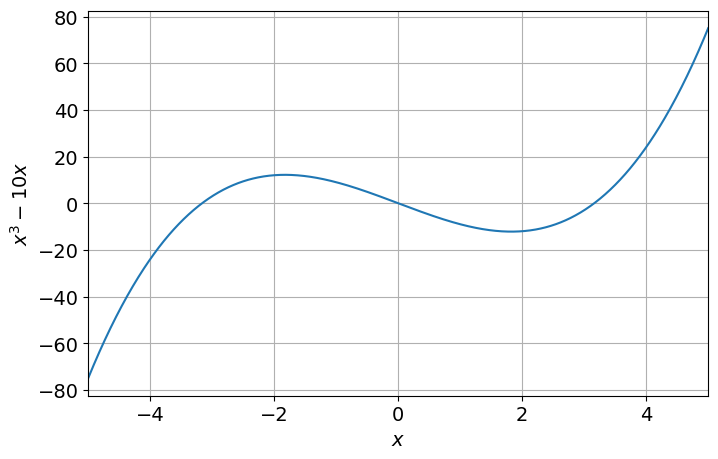

In [76]:
x_x = np.linspace(-5,5,1001)
y_x = x_x**3 - 10*x_x
plt.plot(x_x,y_x);
plt.xlabel(r'$x$'); plt.ylabel(r'$x^3-10x$');
plt.grid(); plt.xlim(-5,5);

## Homework

There is a short practice problem set, Problem Set 0, in MyCourses, due Thursday, with some Python practice.  It won't be graded, but you should submit to the folder to get access to the solutions.